In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
Tasks =pd.read_csv('/Users/yad/Desktop/Project/data_prepared')

In [496]:
Tasks.describe()
#as it can be seen, only our target variable ,maintenance time, has any meaningfull results. 

,Accomodation,Huawei,Maintenance-Time_h
count,482.000000,482.000000,482.000000
mean,0.049793,0.136929,2.103320
std,0.217742,0.344130,2.202878
min,0.000000,0.000000,0.100000
25%,0.000000,0.000000,0.500000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,3.000000
max,1.000000,1.000000,16.000000


In [497]:
Tasks[Tasks.duplicated()]
#we do not have duplicated indecies 

,Date,Accomodation,Huawei,Location,Level,Type,Description,Comments,Date_Done,Maintenance-Time_h,Days_Taken


# 1. Feature Understanding 

Bar Charts

1. Bar chart of top 10 maintenance time

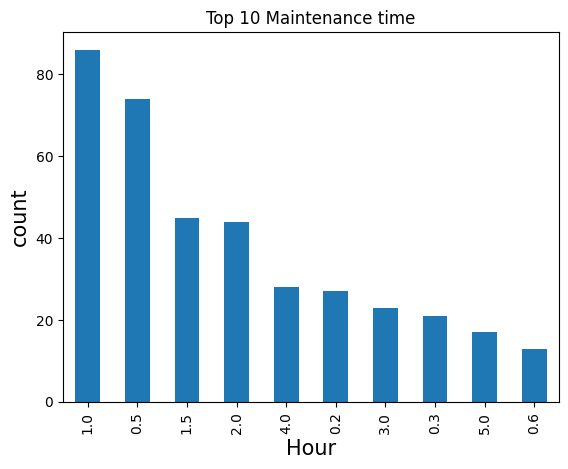

In [528]:
ax= Tasks["Maintenance-Time_h"].value_counts().head(10) \
    .plot(kind="bar", title="Top 10 Maintenance time")
ax.set_xlabel("Hour", fontdict= {'size':15})
ax.set_ylabel("count", fontdict= {'size':15});
# it seems like most frequent time taken by maintaenance is in the 0.5 to 2 hours range. 

2. bar chart of maintenance types

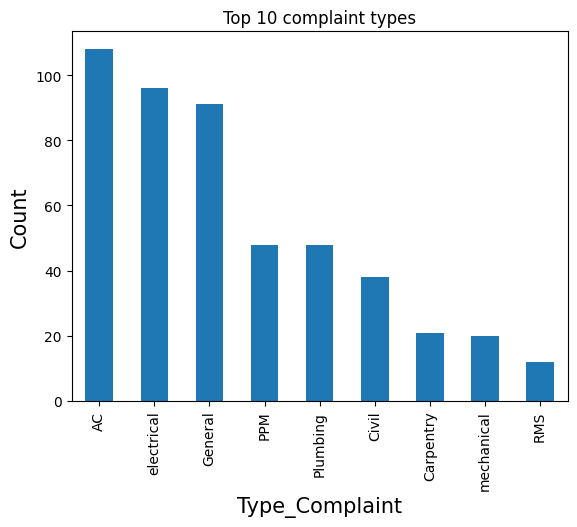

In [527]:
ax= Tasks["Type"].value_counts().head(10) \
    .plot(kind="bar", title=("Top 10 complaint types"))
ax.set_xlabel("Type_Complaint", fontdict= {'size':15})
ax.set_ylabel("Count", fontdict= {'size':15});
#The most frequent type of complaint seems to be AC, which is not a shock as the accomodation building consists of 100+ rooms all with AC units 

Histogran

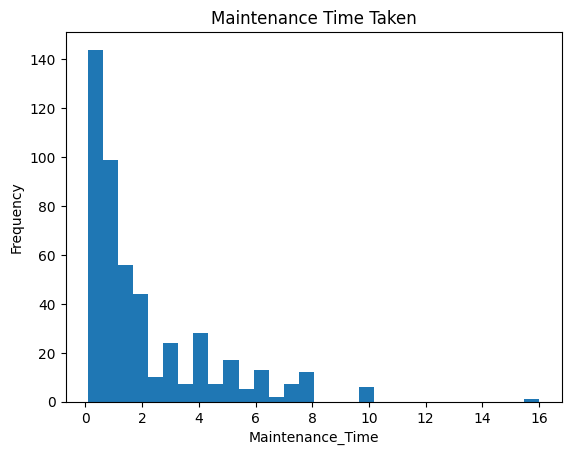

In [529]:
ax= Tasks["Maintenance-Time_h"].plot(kind="hist", bins=30, title= "Maintenance Time Taken");
ax.set_xlabel("Maintenance_Time");

In [542]:
# The histogram above shows us that the most frequent time taken of maintenance are the shorter ones(0-2h), 

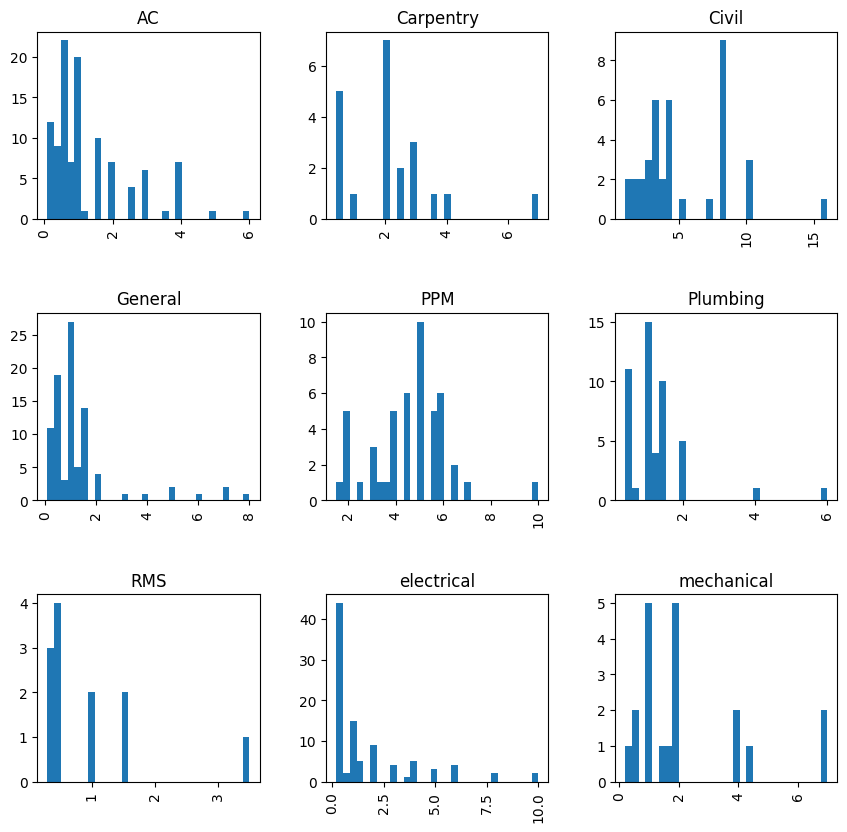

In [503]:
Tasks.hist(column="Maintenance-Time_h",bins=30, by='Type', figsize=(10,10));
#general look of histograms of different maintenance types.


Kernal density estimation

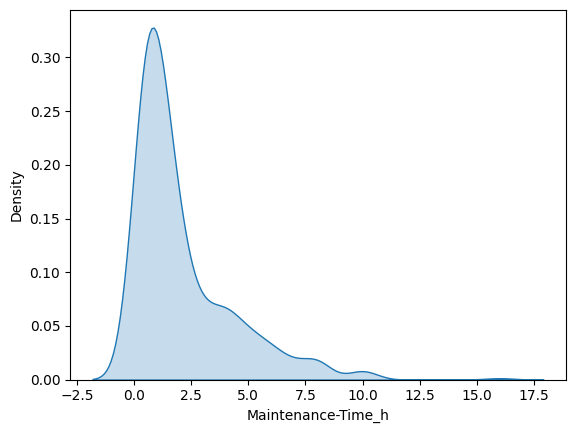

In [531]:
sns.kdeplot(Tasks["Maintenance-Time_h"], fill= True);

In [ ]:
# it can be seen above that  0 - 2.5 hours seems to be the range with the highest probabity desnity, which is in accordance with our histogram 

# Huawei and Accomodation
1. Huawei

Complaints of Huawie Company 

In [532]:
Huawei=Tasks[Tasks.Huawei==1]


1. Bar chart of top 10 maintenance types of Huawei company complaints

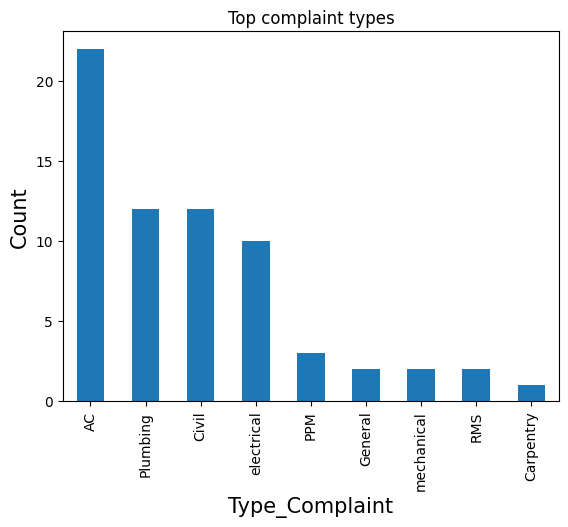

In [533]:
ax= Huawei["Type"].value_counts().head(10) \
    .plot(kind="bar", title=("Top complaint types"))
ax.set_xlabel("Type_Complaint", fontdict= {'size':15})
ax.set_ylabel("Count", fontdict= {'size':15});
#Again, AC seem to be the most frequent complaint 

2. Bar chart of top 10 maintenance time taken of Huawei company

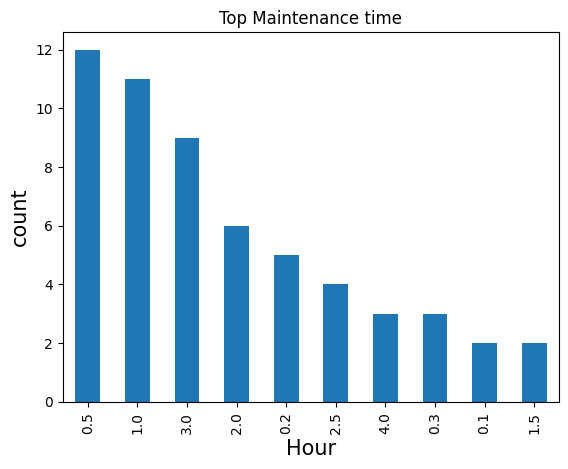

In [534]:
ax= Huawei["Maintenance-Time_h"].value_counts().head(10) \
    .plot(kind="bar", title="Top Maintenance time")
ax.set_xlabel("Hour", fontdict= {'size':15})
ax.set_ylabel("count", fontdict= {'size':15});
# half an hour is the most frequent, which tells us, Huawei company complaints takes less time(1 hour is most frequent in the hotel as shown above) 

Histrogram

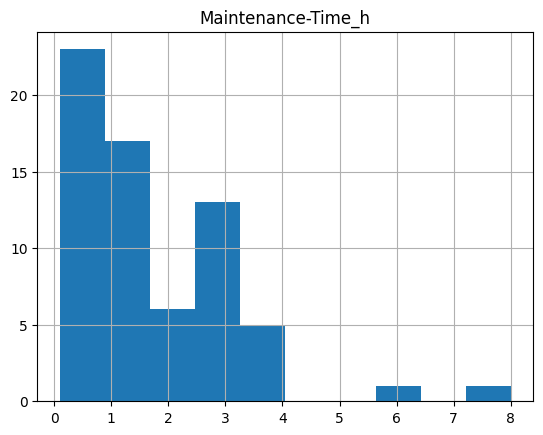

In [535]:
Huawei.hist(column='Maintenance-Time_h');

Groupby

In [566]:
Tasks_h= Huawei.groupby('Type')[["Maintenance-Time_h"]].agg(["sum",'mean']).sort_values([('Maintenance-Time_h', 'mean')], ascending=False)
Tasks_h

Maintenance-Time_h          
                          sum      mean
Type                                   
Civil                    36.5  3.041667
General                   4.0  2.000000
PPM                       6.0  2.000000
electrical               19.0  1.900000
mechanical                3.6  1.800000
Plumbing                 16.5  1.375000
AC                       21.8  0.990909
RMS                       1.8  0.900000
Carpentry                 0.5  0.500000

In [570]:
Tasks_h.loc[:, ("Maintenance-Time_h", "mean")].mean()
# The bellow mean time is less than the over-all time(see begining of document), which means, complaint of Huawei company take less time on average.

1.611952861952862

Kernal density estimation

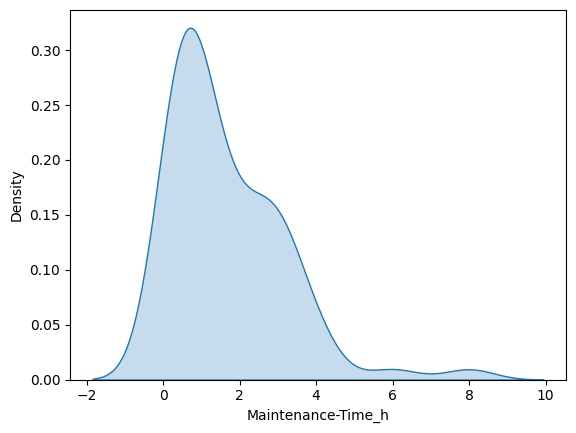

In [510]:
sns.kdeplot(Huawei["Maintenance-Time_h"], fill= True);
# The probablity density is highest between 0-2 hours, which a little bit less than the KDE of the overall data(see above section)


2. Accomidation

Complaints of accomodation Building  

In [536]:
Accomodation=Tasks[Tasks.Accomodation==1]

1. Bar chart of top 10 maintenance time taken of Huawei company complaints

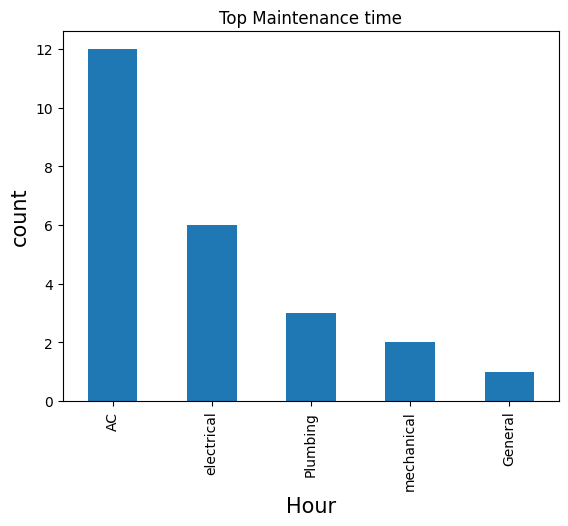

In [537]:
ax= Accomodation["Type"].value_counts().head(10) \
    .plot(kind="bar", title="Top Maintenance time")
ax.set_xlabel("Hour", fontdict= {'size':15})
ax.set_ylabel("count", fontdict= {'size':15});
#Again AC is the most frequent complaint

1. Bar chart of top 10 maintenance types  of Huawei company complaints

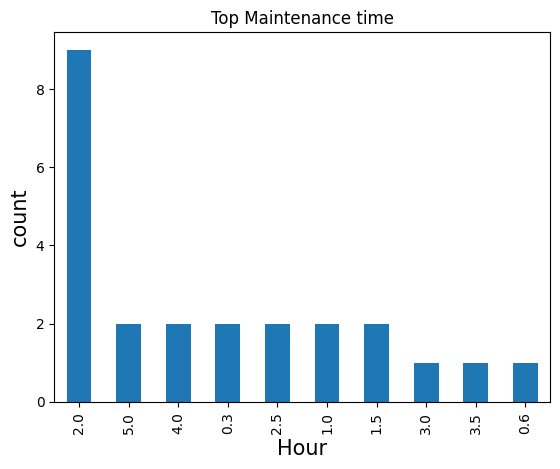

In [571]:
ax= Accomodation["Maintenance-Time_h"].value_counts().head(10) \
    .plot(kind="bar", title="Top Maintenance time")
ax.set_xlabel("Hour", fontdict= {'size':15})
ax.set_ylabel("count", fontdict= {'size':15});
#  the most frequent complaint by the accomodation take the most time compared to both Huawei and hotel all-together. 
#  meaning, any complaint from accomodation building has a higher probablity to take the longest time compared to Huawei, or hotel complaints.

Histogram

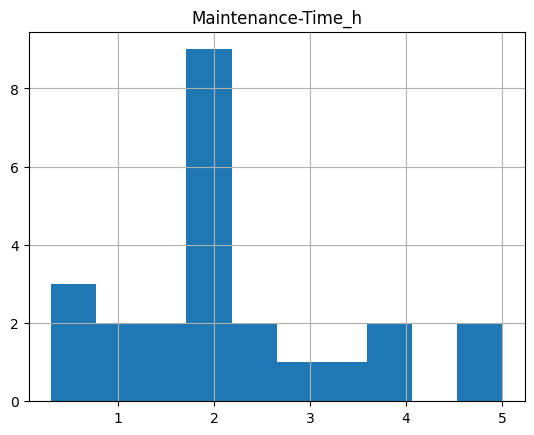

In [540]:
Accomodation.hist(column='Maintenance-Time_h');

Groupby

In [575]:
Tasks_A= Accomodation.groupby('Type')[["Maintenance-Time_h"]].agg(["sum",'mean']).sort_values([('Maintenance-Time_h', 'mean')], ascending=False)
Tasks_A

Maintenance-Time_h          
                          sum      mean
Type                                   
General                   5.0  5.000000
electrical               14.8  2.466667
Plumbing                  6.6  2.200000
mechanical                4.0  2.000000
AC                       23.3  1.941667

In [581]:
Tasks_A.loc[:,("Maintenance-Time_h", "mean")].mean()
#The mean time taken for a complaint of accomodation building is the hightest compared to Huawei (1.6119) or hotel (2.103320)

2.7216666666666667

Kernal density estimation

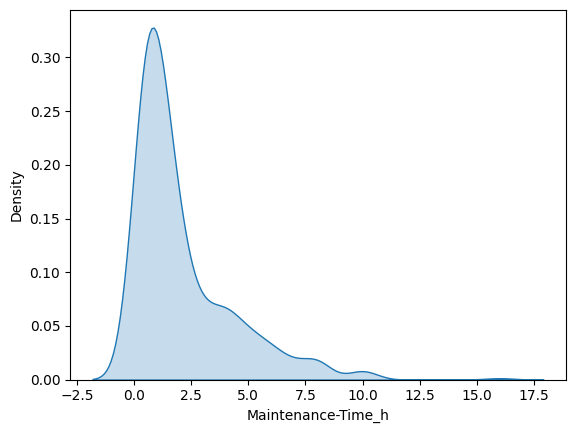

In [516]:
sns.kdeplot(Tasks["Maintenance-Time_h"], fill= True);
# accomodation tasks seem to take more time than Huawei and hotel.

# 2. Feature Relationship

Correlations

In [517]:
Tasks_cor= Tasks.corr(numeric_only=True)
Tasks_cor
#There are no strong correlations in our data!

,Accomodation,Huawei,Maintenance-Time_h
Accomodation,1.000000,-0.091180,0.013958
Huawei,-0.091180,1.000000,-0.079858
Maintenance-Time_h,0.013958,-0.079858,1.000000


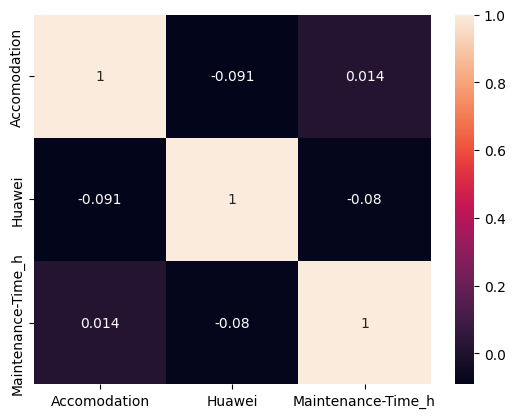

In [525]:
sns.heatmap(Tasks_cor, annot=True);
#not strong correlations as shown again by heatmap.

Please note that there are no scatter-plots as we dont have many numerical columns to make meaningful scatter plots

# 3. Asking questions about the data

    Q1: Does AC maintenance takes the most time since it is the most frequent complaint? See feature understanding section for proof that AC is the most frequent complaint.

In [519]:
Tasks.groupby("Type")[['Maintenance-Time_h']].agg(['sum', 'mean']).sort_values(by=[('Maintenance-Time_h', "sum")], ascending= False)


Maintenance-Time_h          
                          sum      mean
Type                                   
PPM                     220.2  4.587500
Civil                   195.5  5.144737
electrical              170.0  1.770833
AC                      142.1  1.315741
General                 121.9  1.339560
Plumbing                 61.0  1.270833
Carpentry                45.9  2.185714
mechanical               45.8  2.290000
RMS                      11.4  0.950000

As it can also be seen above, eventhough AC was the most frequent complaint (refer back to bar chart of feature understaing), AC does not nearly take the most time overall.

    Q2: An interesting question is, does 0-2 hour type maintenances(most frequent as shown in feature understaing section) also represent maintenances with most times taken?

In [541]:
Tasks.groupby("Type")[['Maintenance-Time_h']].agg('mean').sort_values(by=[('Maintenance-Time_h')], ascending= False)

,Maintenance-Time_h
Type,
Civil,5.144737
PPM,4.587500
mechanical,2.290000
Carpentry,2.185714
electrical,1.770833
General,1.339560
AC,1.315741
Plumbing,1.270833
RMS,0.950000


The answer to our question is no, most time spent by one maintenance type is not  from most frequent 0-2 hours types

    Q3: Find top 10 descriptions about complaints that take the most maintenance time?

In [524]:
Tasks[~Tasks.Description.isna()].groupby("Description")[['Maintenance-Time_h']] \
                        .agg('sum') \
                        .sort_values(by="Maintenance-Time_h", ascending=False) \
                        .head(10)\
                        

,Maintenance-Time_h
Description,
everything but flushing AC coil,163.5
TV setup box issue,48.1
wash basin drain is blocked,25.4
"approximately in 14 m length, all the ceiling, gypsum board and plastic boards combined collapsed",16.0
wardrope not sliding,12.5
Actuator was not fully in place,11.8
filter not clean,11.7
Putting light all over the trees,11.0
WC hose leaking,10.5


everything but flushing just means complete PPM of a room. Maybe a conclusion would be that tv setup box should be changed to a better brand.